In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 気象データを管理するモジュール

## 1. Functions

### 1.1 外気温度と水平面全天日射量の読み込み

#### 入力値

location ：気象データの地点ID  

#### 出力値

$ H $ ：1月1日1時を1時間目（$H=1$）とする計算対象時間の年通算時間 (h)  
$ D $ ：1月1日を1日目（$D=1$）とする計算対象日の年通算日 (day)  
$ T_m $ ：標準時 (h)  
$ I_G $ ：水平面全天日射量 [MJ/(m<sup>2</sup>･h)]  
$ \theta_{ex}$ ：外気温 (℃)  

#### データの読込方法

拡張アメダス気象データから出力された時刻別の外気温及び水平面全天日射量の年間ファイル(2次元配列、CSV形式)を読み込み、再配列して1次元のリストとする。  
読込データの先頭行・先頭列・最終列は、不要なため削除する。

In [2]:
#気象データ読込と再配列
#年通算時間、年通算日、標準時、外気温、水平面全天日射量
def weather_input(L):
    
    w_tmp = np.genfromtxt(L + '_tmp.CSV', skip_header = 1, delimiter = ',', dtype = float)
    w_ig  = np.genfromtxt(L + '_ig.CSV', skip_header = 1, delimiter = ',', dtype = float)

    r_nhr  = np.zeros(8760)
    r_nday = np.zeros(8760)
    r_tm   = np.zeros(8760)
    r_tmp  = np.zeros(8760)
    r_ig   = np.zeros(8760)

    for i in range(0, 365):
        for j in range(0, 24):
            r_nhr[i * 24 + j]  = i * 24 + j + 1    #年通算時間[h]
            r_nday[i * 24 + j] = i + 1             #年通算日[day]
            r_tm[i * 24 + j]   = j + 1             #標準時[h]
            r_tmp[i * 24 + j]  = w_tmp[i, j + 1]   #外気温(℃)
            r_ig[i * 24 + j]   = w_ig[i, j + 1]    #全天日射量(MJ/(m2h))
    
    return r_nhr, r_nday, r_tm, r_tmp, r_ig

#### Example

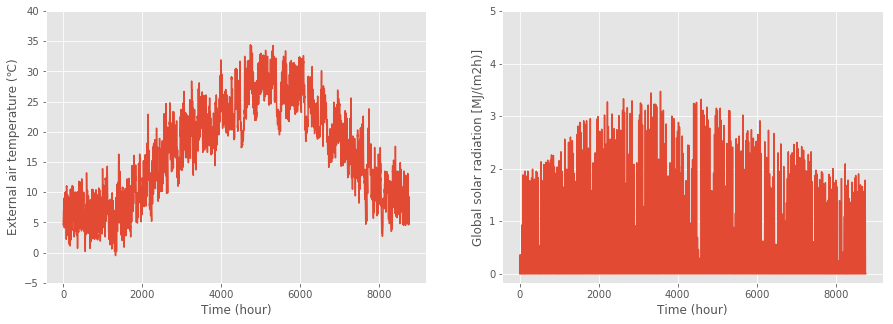

In [3]:
location = '3639999'  #東京ID

#気象データ読込
nhr = weather_input(location)[0]
nday = weather_input(location)[1]
tm = weather_input(location)[2]
tmp = weather_input(location)[3]
ig = weather_input(location)[4]

#グラフの描画
graph_num = 2
ax = np.empty(graph_num, dtype = np.object)
fig = plt.figure(figsize = (15, 5 * ((graph_num + 1) // 2)))
plt.style.use('ggplot')

gpc = 'C0'
gxd = nhr
gyd = [tmp, ig]
gxl = 'Time (hour)'
gyl = ['External air temperature (℃)', 'Global solar radiation [MJ/(m2h)]']
gyt = [[5 * (i - 1) for i in range(10)], [1 * i for i in range(6)]]

for i in range(graph_num):   
    ax[i] = fig.add_subplot((graph_num + 1) // 2, 2, i + 1)
    ax[i].plot(gxd, gyd[i], color = gpc)
    ax[i].set_yticks(gyt[i])
    ax[i].set_xlabel(gxl, fontsize = 12)
    ax[i].set_ylabel(gyl[i], fontsize = 12)

plt.show()